# Lab 5

Ali Tejani, amt3639

Caroline Yao, chy253

Allen Hwang

## Problem 1: Linear Discriminant Analysis

### 1. Plot samples from similar gaussians

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [156]:
# randomly sample distributions 20 times each
cov1 = [[1,0.9,0.9],[0.9,1,0.9],[0.9,0.9,1]]
cov2 = [[1,0.8,0.8],[0.8,1,0.8],[0.8,0.8,1]]
p1 = np.random.multivariate_normal([0,0,0],cov1,20)
p2 = np.random.multivariate_normal([0,0,1],cov2,20)

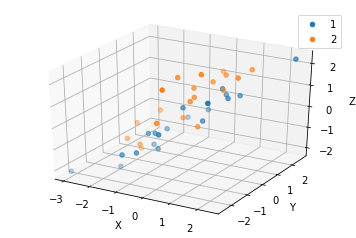

In [157]:
# plot on 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p1[:,0],p1[:,1],p1[:,2],label='1')
ax.scatter(p2[:,0],p2[:,1],p2[:,2],label='2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

### 2. Project distributions onto 1D using LDA

We will simply use the formulas we learned in class, minimizing the variance within the groups of points and maximizing the variance between them.

w*max* = S*w*^-1 * (u1-u2)

In [158]:
# get means of distributions
mean1 = np.mean(p1,axis=0)
mean2 = np.mean(p2,axis=0)
print "mean of 1:"
print mean1
print "mean of 2:"
print mean2
mean_diff = mean2-mean1

mean of 1:
[-0.2024501  -0.23188879 -0.11253333]
mean of 2:
[ 0.06995855 -0.234914    0.96522149]


In [159]:
# find the scatter matrices of the data points
scatter1 = np.dot((p1-mean1).T,p1)
scatter2 = np.dot((p2-mean2).T,p2)
print "cov of 1:"
print scatter1/p1.shape[0]
print "cov of 2:"
print scatter2/p2.shape[0]
scatterW = scatter1 + scatter2

cov of 1:
[[ 1.30118141  1.29450416  1.16041225]
 [ 1.29450416  1.4867519   1.21767584]
 [ 1.16041225  1.21767584  1.14952979]]
cov of 2:
[[ 0.65769284  0.5904476   0.58541072]
 [ 0.5904476   0.82415299  0.67326687]
 [ 0.58541072  0.67326687  0.96310259]]


In [160]:
# plug into equation
wmax = np.dot(np.linalg.inv(scatterW),mean_diff)

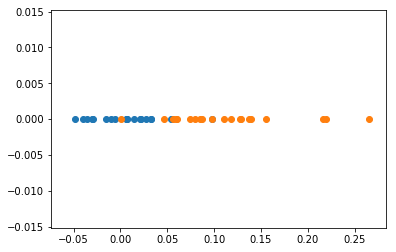

In [161]:
newPoints1 = np.dot(p1,wmax)
plt.scatter(newPoints1,[0]*len(newPoints1))
newPoints2 = np.dot(p2,wmax)
plt.scatter(newPoints2,[0]*len(newPoints2))

### 3. Using sklearn

In [162]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# combine points and create label array
combinedPoints = np.concatenate((p1,p2))
labels = np.array([1]*len(p1) + [2]*len(p2))

In [163]:
# perform transformation
clf = LinearDiscriminantAnalysis(n_components=2)
newPoints = clf.fit_transform(combinedPoints,labels)

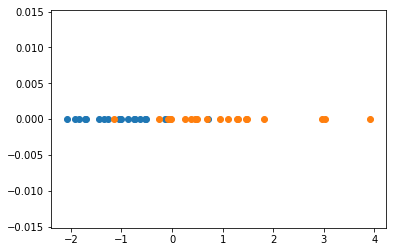

In [165]:
# plot separate distributions separately
plt.scatter(newPoints[:20],[0]*len(newPoints[:20]))
plt.scatter(newPoints[20:],[0]*len(newPoints[20:]))

The plots are almost identical. However they seem to be scaled differently. 

## Problem 2. Problem 10 from Chapter 4